# 자전거 통행량 예측 

날씨와 계절 요인이 시애틀 프리몬트 다리를 지나는 자전거 통행량에 영향을 주는지 분석.  

### 데이터 적재 

[FremontBridge 자전거데이터](https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k)  
[날씨데이터](https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks/data)

In [10]:
import pandas as pd 

counts = pd.read_csv('./data/FremontBridge.csv', index_col ='Date', parse_dates = True)
weather = pd.read_csv('./data/BicycleWeather.csv', index_col = 'DATE', parse_dates = True)
pd.set_option('display.max_columns', None)

In [11]:
counts.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [12]:
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,FMTM,WT14,WT01,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,89,112,-9999,1,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,130,179,-9999,-9999,1,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,54,67,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,107,148,-9999,-9999,1,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,107,165,-9999,-9999,1,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [13]:
# 일별 총 자전거 통계량 계산 

daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # 다른 열 삭제 

In [14]:
daily.head()

,Total
Date,
2012-10-03,14084.0
2012-10-04,13900.0
2012-10-05,12592.0
2012-10-06,8024.0
2012-10-07,8568.0


In [15]:
# 요일에 따라 자전거 통행량이 다름 -> 요일 이진 열 추가 

days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [16]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
# 휴일도 다른 패턴을 보일 수 있음 

from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012','2016')

daily = daily.join(pd.Series(1, index =holidays, name = 'holiday'))
daily['holiday'].fillna(0, inplace = True)

In [19]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# 일조시간이 자전거를 타는 수에 영향을 줄 수 있음 
import numpy as np

def hours_of_daylight(date, axis=23.44, latitude = 47.61):
    """ 해당 날짜의 일조시간의 계산 """
    
    days = (date - pd.datetime(2000,12,21)).days
    m = (1 - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25 )))
    
    return 24.*np.degrees(np.arccos(1-np.clip(m,0,2))) / 180.

<ipython-input-20-ad4dcfc75078>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = (date - pd.datetime(2000,12,21)).days


(8.0, 17.0)

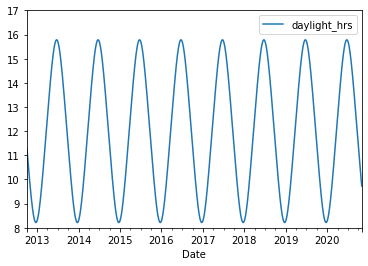

In [22]:
import matplotlib.pyplot as plt 
%matplotlib inline

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot();
plt.ylim(8,17)

In [23]:
daily.tail()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs
Date,,,,,,,,,,
2020-10-27,4090.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.933420
2020-10-28,3848.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.881095
2020-10-29,4308.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.829193
2020-10-30,3688.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.777731
2020-10-31,5380.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.726725


In [24]:
# 기온은 섭씨 1/10도 단위; 섭씨 1도 단위로 변환 
weather['TMIN'] /=10
weather['TMAX'] /=10

#평균기온
weather['Temp (C)'] = 0.5*(weather['TMIN'] + weather['TMAX'])

In [25]:
# 강수량은 1/10mm 단위, 인치 단위로 변환 

weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP']==0).astype(int)

In [26]:
daily = daily.join(weather[['PRCP','Temp (C)', 'dry day']])

In [27]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day
Date,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0


In [30]:
# 첫날부터 증가하는 계수기를 추가해 몇 해가 지났는지 측정 
daily['annual'] = (daily.index - daily.index[0]).days / 365

In [31]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


## 선형 회귀모델 
데이터 모델 적합 

In [32]:
# 널 값 가지는 행 제거
daily.dropna(axis=0, how='any', inplace =True)

In [33]:
column_names = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun','holiday',
                'daylight_hrs','PRCP','dry day','Temp (C)','annual']

In [34]:
X = daily[column_names]
y = daily['Total']

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression(fit_intercept = False ) 
# 요일 플래그는 근복적으로 해당 요일에 특화된 절편으로 동작하기 때문에 fit_intercept=F 설정 

In [37]:
model.fit(X,y)

LinearRegression(fit_intercept=False)

In [38]:
daily['predicted'] = model.predict(X)

## 실제 자전거 통행량 과 예상 자전거 통행량 비교 

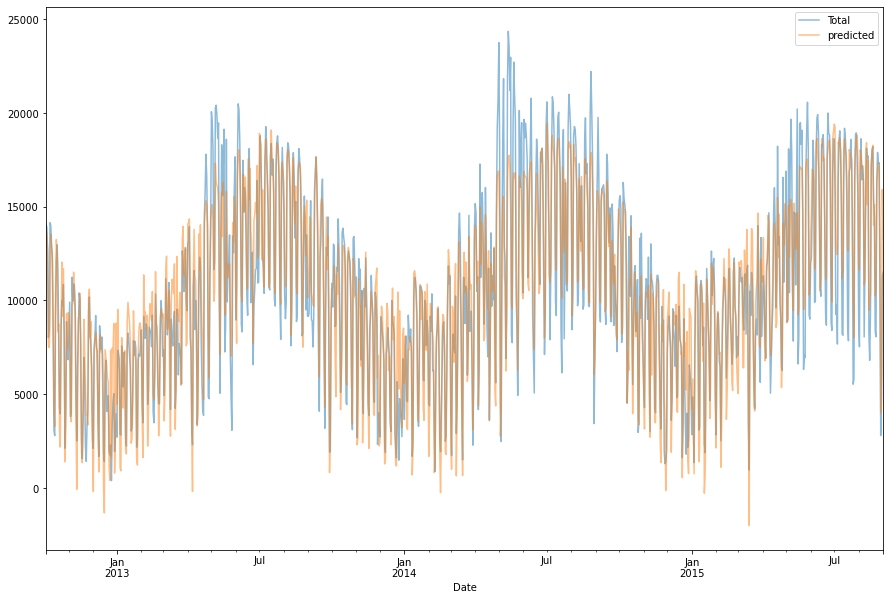

In [47]:
daily[['Total','predicted']].plot(alpha = 0.5 ,figsize = (15,10))

비교 결과 고려하지 못한 다른 요인이 있거나, 고려하지 못한 비선형 관계가 존재할 것으로 보임.

### 선형모델 계수 

요일별 자전거 통행량에 얼마나 기여하는지 추정하는 선형모델의 계수

In [48]:
params = pd.Series(model.coef_, index = X.columns)

In [49]:
params

Mon             2019.531023
Tue             2440.935744
Wed             2370.694566
Thu             1929.432461
Fri              711.921382
Sat            -4413.206842
Sun            -4534.268983
holiday        -4749.605523
daylight_hrs     515.406045
PRCP           -2659.339527
dry day         2190.794369
Temp (C)         260.651164
annual           107.770852
dtype: float64

### Bootstrap : 불확실성에 대한 계산 

In [50]:
from sklearn.utils import resample

np.random.seed(1)
err = np.std([model.fit(*resample(X,y)).coef_
             for i in range(1000)], 0 )

In [51]:
pd.DataFrame({'effect' : params.round(0), 'error':err.round(0)})

,effect,error
Mon,2020.0,345.0
Tue,2441.0,333.0
Wed,2371.0,331.0
Thu,1929.0,341.0
Fri,712.0,324.0
Sat,-4413.0,318.0
Sun,-4534.0,332.0
holiday,-4750.0,653.0
daylight_hrs,515.0,36.0
PRCP,-2659.0,249.0


# 모델 개선 

## 1. 강수량과 추운 기온의 영향 
## 2. 매우 춥거나 매우 더운 온도의 영향 
## 3. 아침에 비가 오는 것과 오후에 오는 것의 차이
## 4. 요일 간의 상관관계 